<a href="https://colab.research.google.com/github/AKINYEMI01/Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Load Dataset

In [2]:
filename = '/content/drive/MyDrive/diabetic_data.csv'
df = pd.read_csv(filename)

In [3]:
df.shape

(101766, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.head(50)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Explanatory Data Analysis


In [6]:
# Check the descriptive statictis
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
# Check for missing values
df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [8]:
# Drop the unnecessary columns
df.drop(['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty','encounter_id','patient_nbr'], axis=1, inplace=True)

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
df['race'] = df['race'].apply(lambda x: 'Other' if x == '?' else x)

In [11]:
# Replace ? with nan
df = df.replace({'?': np.nan})

In [12]:
df.isna().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [13]:
# Drop missing values
df = df.dropna()

In [14]:
# Remove rows where gender is 'Unknown/Invalid'
df = df[df['gender'] != 'Unknown/Invalid']

# Verify the change by checking the value counts of the 'gender' column
display(df['gender'].value_counts())

,count
gender,
Female,53922
Male,46319


In [15]:
# Check the class distribution
df['readmitted'].value_counts()

,count
readmitted,
NO,53818
>30,35173
<30,11250


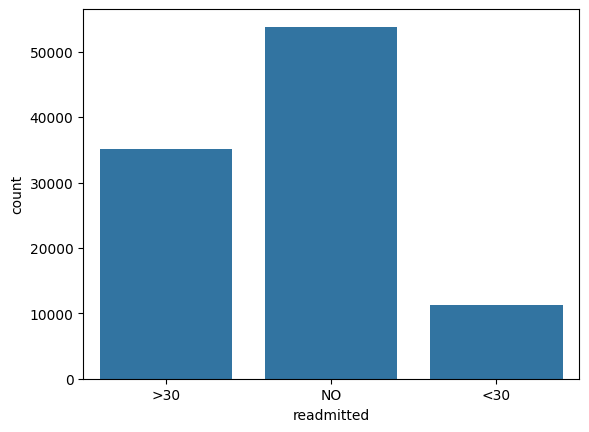

In [16]:
# Visualize the distribution of readmiited
sns.countplot(x='readmitted', data=df)
plt.show()

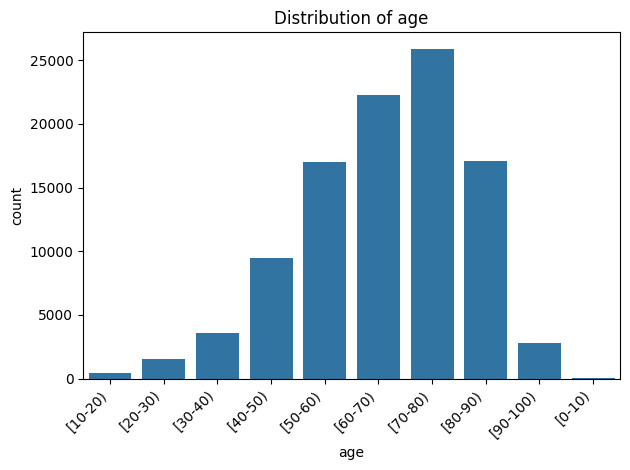

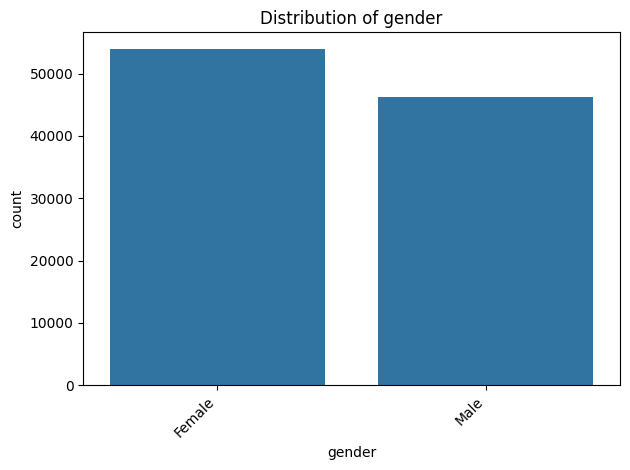

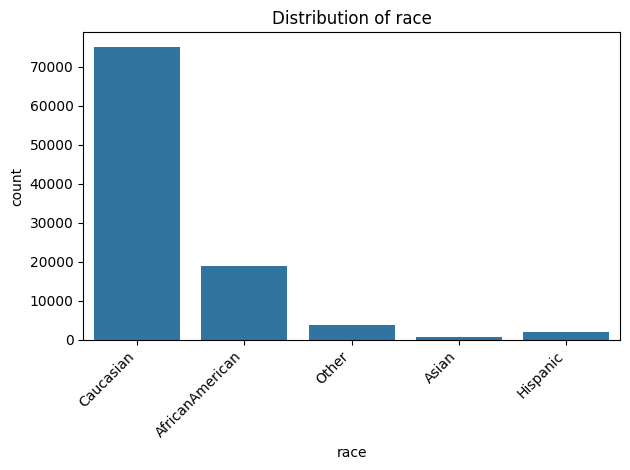

In [17]:
# Visualize the distribution of specified categorical columns
columns = ['age', 'gender', 'race']
for col in columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [18]:
# Categorize into binary target and drop the readmitted due to data leakage
df['readmited_binary'] = df['readmitted'].apply(lambda x: 1 if x != 'NO' else 0)

# ***Explicitly drop the original 'readmitted' column***
df = df.drop('readmitted', axis=1)

Text(0, 0.5, 'Count')

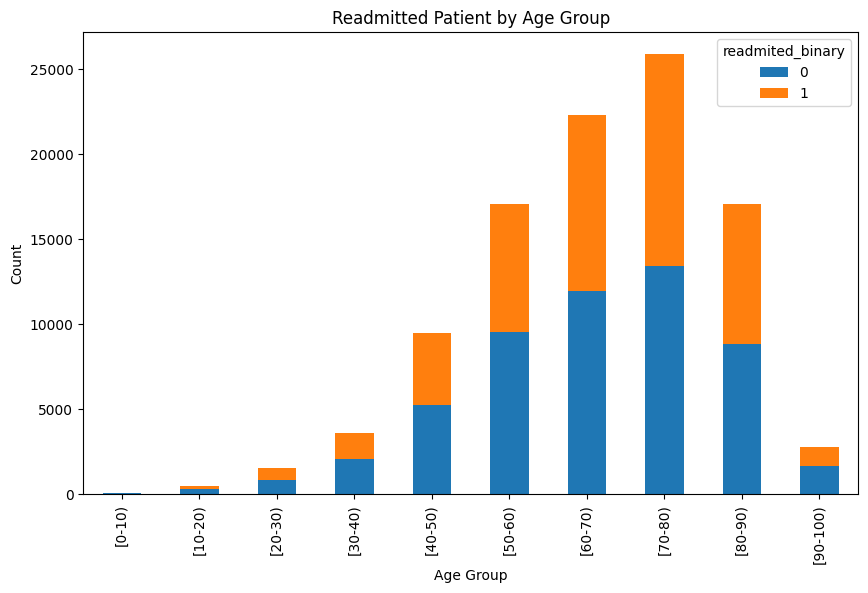

In [19]:
# stacked Bar plot showing the readmitted patient with age
age_readmitted = df.groupby(['age', 'readmited_binary']).size().unstack()
age_readmitted.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Readmitted Patient by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

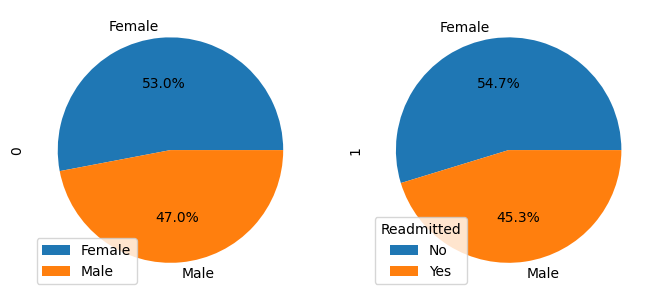

In [20]:
# Pie chart showing the readmitted patient against gender, show the %
gender_readmitted = df.groupby(['gender', 'readmited_binary']).size().unstack()
gender_readmitted.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(8, 5))
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.show()

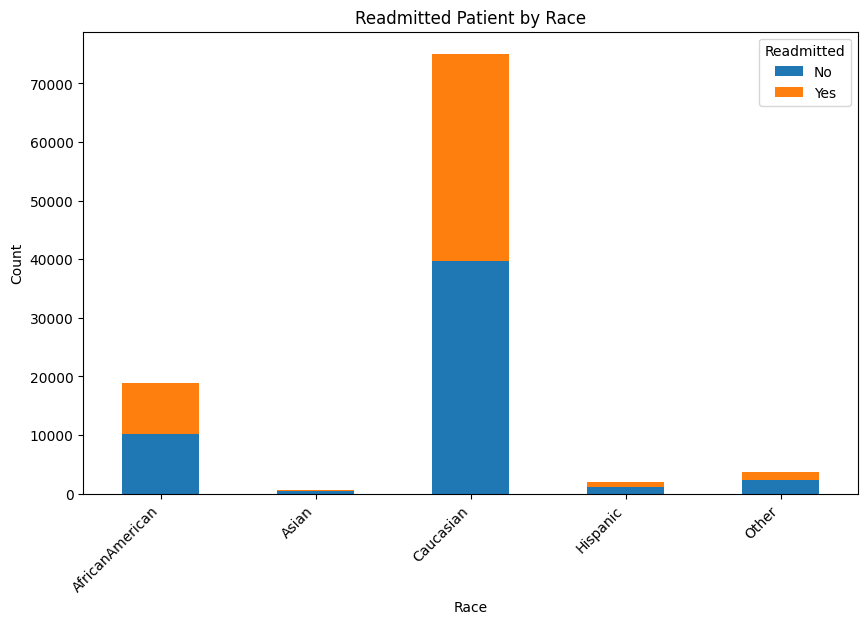

In [21]:
# Barchart showing the readmitted patient against race
race_readmitted = df.groupby(['race', 'readmited_binary']).size().unstack()
race_readmitted.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Readmitted Patient by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Readmitted', labels=['No', 'Yes'])

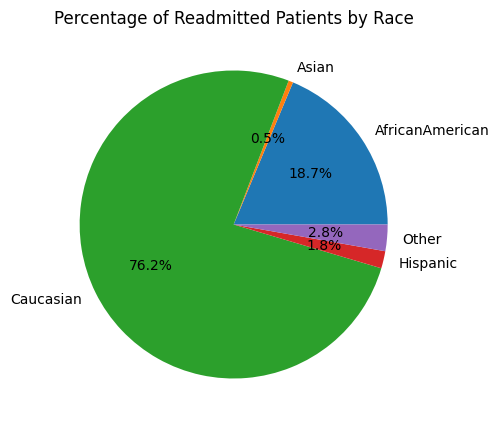

In [22]:
# Plot the pie chart of just the readmitted patient 1 against race
readmitted_df = df[df['readmited_binary'] == 1]
race_readmitted = readmitted_df.groupby('race').size()
race_readmitted.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 5))
plt.title('Percentage of Readmitted Patients by Race')
plt.ylabel('')
plt.show()


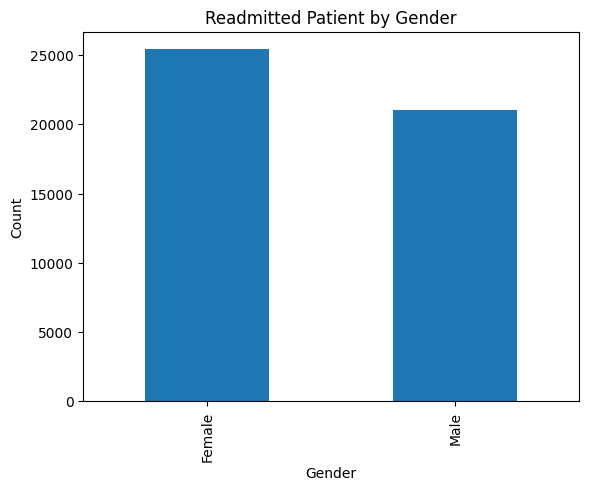

In [23]:
# Plot the bar chart of just the readmitted patient 1 against gender
readmitted_df = df[df['readmited_binary'] == 1]
gender_readmitted = readmitted_df.groupby('gender').size()
gender_readmitted.plot(kind='bar')
plt.title('Readmitted Patient by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [24]:
# Encode all categorical data
# Select categorical columns (excluding the binary target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'readmited_binary' in categorical_cols:
    categorical_cols.remove('readmited_binary')

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('readmited_binary', axis=1)
y = df_encoded['readmited_binary']

# Normalize data

In [25]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler and transform the data
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled

array([[-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
        -1.07828423,  0.54703706],
       [-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
         0.92739927,  0.54703706],
       [-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
        -1.07828423,  0.54703706],
       ...,
       [-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
        -1.07828423,  0.54703706],
       [-0.01575531, -0.1380775 ,  0.30503155, ..., -0.00315849,
        -1.07828423,  0.54703706],
       [-0.70783596, -0.51681159,  0.30503155, ..., -0.00315849,
         0.92739927, -1.82802972]])

# DATASET SPLITTING

In [27]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80192, 2319)
Testing set shape: (20049, 2319)


In [28]:
# Calculate the correlation of each feature with the target variable
correlation_with_target = X_train.corrwith(y_train).sort_values(ascending=False)

# Display the correlations
print("Correlation of features with the target variable:")
display(correlation_with_target)

Correlation of features with the target variable:


,0
number_inpatient,0.215622
number_diagnoses,0.107169
number_emergency,0.103248
number_outpatient,0.081051
diag_1_428,0.067653
...,...
diag_3_E886,NaN
diag_3_E894,NaN
diag_3_E945,NaN
acetohexamide_Steady,NaN


In [29]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Make prediction on the test data
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

# Model Evaluation

In [31]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.6303
Precision: 0.6388
Recall: 0.4477
F1-Score: 0.5265

Confusion Matrix:


array([[8515, 2330],
       [5083, 4121]])

# Optimize Original Logistic Regression Model

In [32]:
# Initialize GridSearchCV for the original Logistic Regression model
# Using a smaller parameter grid and reduced cv folds to manage memory
param_grid_original_lr = {
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear']
}

grid_search_original_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=100), param_grid=param_grid_original_lr, cv=5, scoring='f1', n_jobs=-1) # Increased cv to 5 and max_iter for saga

# Fit GridSearchCV to the original training data
grid_search_original_lr.fit(X_train, y_train)

# Get the best parameters and best score for the original model
best_params_original_lr = grid_search_original_lr.best_params_
best_score_original_lr = grid_search_original_lr.best_score_

print("Best Hyperparameters for Original Logistic Regression:", best_params_original_lr)
print("Best F1-Score from GridSearchCV (Original Data):", best_score_original_lr)

Best Hyperparameters for Original Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best F1-Score from GridSearchCV (Original Data): 0.5469195369048397


# Evaluate Optimized Original Logistic Regression Model

In [33]:
# Initialize a new Logistic Regression model with the best hyperparameters found on the original data
optimized_original_lr_model = LogisticRegression(random_state=42, **grid_search_original_lr.best_params_)

# Train the model using the original training data
optimized_original_lr_model.fit(X_train, y_train)

# Make predictions on the original test data
y_pred_optimized_original_lr = optimized_original_lr_model.predict(X_test)

# Calculate evaluation metrics for the optimized original model
accuracy_optimized_original_lr = accuracy_score(y_test, y_pred_optimized_original_lr)
precision_optimized_original_lr = precision_score(y_test, y_pred_optimized_original_lr)
recall_optimized_original_lr = recall_score(y_test, y_pred_optimized_original_lr)
f1_optimized_original_lr = f1_score(y_test, y_pred_optimized_original_lr)
conf_matrix_optimized_original_lr = confusion_matrix(y_test, y_pred_optimized_original_lr)

print(f"Optimized Original Logistic Regression Accuracy: {accuracy_optimized_original_lr:.4f}")
print(f"Optimized Original Logistic Regression Precision: {precision_optimized_original_lr:.4f}")
print(f"Optimized Original Logistic Regression Recall: {recall_optimized_original_lr:.4f}")
print(f"Optimized Original Logistic Regression F1-Score: {f1_optimized_original_lr:.4f}")
print("\nOptimized Original Logistic Regression Confusion Matrix:")
display(conf_matrix_optimized_original_lr)

Optimized Original Logistic Regression Accuracy: 0.6272
Optimized Original Logistic Regression Precision: 0.6186
Optimized Original Logistic Regression Recall: 0.4898
Optimized Original Logistic Regression F1-Score: 0.5467

Optimized Original Logistic Regression Confusion Matrix:


array([[8066, 2779],
       [4696, 4508]])

#USING SMOTE FOR CLASS IMBALANCE

In [34]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_resampled.shape)
print("Original training target distribution:\n", y_train.value_counts())
print("Resampled training target distribution:\n", y_train_resampled.value_counts())

Original training set shape: (80192, 2319)
Resampled training set shape: (85946, 2319)
Original training target distribution:
 readmited_binary
0    42973
1    37219
Name: count, dtype: int64
Resampled training target distribution:
 readmited_binary
0    42973
1    42973
Name: count, dtype: int64


In [35]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=100), param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1-Score from GridSearchCV:", best_score)

Best Hyperparameters: {'C': 0.001, 'solver': 'liblinear'}
Best F1-Score from GridSearchCV: 0.5582669078904052


In [36]:
# Initialize a new Logistic Regression model with the best hyperparameters
optimized_lr_model_tuned = LogisticRegression(random_state=42, **grid_search.best_params_)

# Train the new Logistic Regression model using the resampled training data
optimized_lr_model_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test data
y_pred_optimized_lr_tuned = optimized_lr_model_tuned.predict(X_test)

# Calculate evaluation metrics for the optimized and tuned model
accuracy_optimized_lr_tuned = accuracy_score(y_test, y_pred_optimized_lr_tuned)
precision_optimized_lr_tuned = precision_score(y_test, y_pred_optimized_lr_tuned)
recall_optimized_lr_tuned = recall_score(y_test, y_pred_optimized_lr_tuned)
f1_optimized_lr_tuned = f1_score(y_test, y_pred_optimized_lr_tuned)
conf_matrix_optimized_lr_tuned = confusion_matrix(y_test, y_pred_optimized_lr_tuned)

print(f"Optimized and Tuned Logistic Regression Accuracy: {accuracy_optimized_lr_tuned:.4f}")
print(f"Optimized and Tuned Logistic Regression Precision: {precision_optimized_lr_tuned:.4f}")
print(f"Optimized and Tuned Logistic Regression Recall: {recall_optimized_lr_tuned:.4f}")
print(f"Optimized and Tuned Logistic Regression F1-Score: {f1_optimized_lr_tuned:.4f}")
print("\nOptimized and Tuned Logistic Regression Confusion Matrix:")
display(conf_matrix_optimized_lr_tuned)

Optimized and Tuned Logistic Regression Accuracy: 0.6246
Optimized and Tuned Logistic Regression Precision: 0.6065
Optimized and Tuned Logistic Regression Recall: 0.5190
Optimized and Tuned Logistic Regression F1-Score: 0.5594

Optimized and Tuned Logistic Regression Confusion Matrix:


array([[7746, 3099],
       [4427, 4777]])

# Optimize Original Logistic Regression Model using RandomizedSearchCV

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Initialize RandomizedSearchCV for the original Logistic Regression model
param_distributions_original_lr_rs = {
    'C': uniform(loc=0, scale=100), # Using a continuous distribution for C
    'solver': ['liblinear']
}

# Setting n_iter to a reasonable number, e.g., 20
random_search_original_lr = RandomizedSearchCV(estimator=LogisticRegression(random_state=42, max_iter=100), param_distributions=param_distributions_original_lr_rs, n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the original training data
random_search_original_lr.fit(X_train, y_train)

# Get the best parameters and best score for the original model
best_params_original_lr_rs = random_search_original_lr.best_params_
best_score_original_lr_rs = random_search_original_lr.best_score_

print("Best Hyperparameters for Original Logistic Regression (Randomized Search):", best_params_original_lr_rs)
print("Best F1-Score from RandomizedSearchCV (Original Data):", best_score_original_lr_rs)



Best Hyperparameters for Original Logistic Regression (Randomized Search): {'C': np.float64(15.601864044243651), 'solver': 'liblinear'}
Best F1-Score from RandomizedSearchCV (Original Data): 0.548066813145628


In [38]:
# --- Start of new code to calculate metrics for Optimized Original Logistic Regression (Randomized Search) ---
# Initialize a new Logistic Regression model with the best hyperparameters found using Randomized Search
optimized_original_lr_model_rs = LogisticRegression(random_state=42, **random_search_original_lr.best_params_)

# Train the model using the original training data
optimized_original_lr_model_rs.fit(X_train, y_train)

# Make predictions on the original test data
y_pred_optimized_original_lr_rs = optimized_original_lr_model_rs.predict(X_test)

# Calculate evaluation metrics for the optimized original model
accuracy_optimized_original_lr_rs = accuracy_score(y_test, y_pred_optimized_original_lr_rs)
precision_optimized_original_lr_rs = precision_score(y_test, y_pred_optimized_original_lr_rs)
recall_optimized_original_lr_rs = recall_score(y_test, y_pred_optimized_original_lr_rs)
f1_optimized_original_lr_rs = f1_score(y_test, y_pred_optimized_original_lr_rs)
conf_matrix_optimized_original_lr_rs = confusion_matrix(y_test, y_pred_optimized_original_lr_rs)
# --- End of new code ---

# Also print evaluation metrics from the evaluation cell
print(f"Optimized Original Logistic Regression Accuracy (Randomized Search): {accuracy_optimized_original_lr_rs:.4f}")
print(f"Optimized Original Logistic Regression Precision (Randomized Search): {precision_optimized_original_lr_rs:.4f}")
print(f"Optimized Original Logistic Regression Recall (Randomized Search): {recall_optimized_original_lr_rs:.4f}")
print(f"Optimized Original Logistic Regression F1-Score (Randomized Search): {f1_optimized_original_lr_rs:.4f}")
print("\nOptimized Original Logistic Regression Confusion Matrix (Randomized Search):")
display(conf_matrix_optimized_original_lr_rs)

Optimized Original Logistic Regression Accuracy (Randomized Search): 0.6245
Optimized Original Logistic Regression Precision (Randomized Search): 0.6132
Optimized Original Logistic Regression Recall (Randomized Search): 0.4933
Optimized Original Logistic Regression F1-Score (Randomized Search): 0.5467

Optimized Original Logistic Regression Confusion Matrix (Randomized Search):


array([[7981, 2864],
       [4664, 4540]])

# Optimize Logistic Regression Model after SMOTE using RandomizedSearchCV

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV
param_distributions_rs = {
    'C': uniform(loc=0, scale=100),
    'solver': ['liblinear']
}

# Initialize RandomizedSearchCV
random_search_smote_lr = RandomizedSearchCV(estimator=LogisticRegression(random_state=42, max_iter=100), param_distributions=param_distributions_rs, n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the resampled training data
random_search_smote_lr.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params_smote_lr_rs = random_search_smote_lr.best_params_
best_score_smote_lr_rs = random_search_smote_lr.best_score_

print("Best Hyperparameters (Randomized Search after SMOTE):", best_params_smote_lr_rs)
print("Best F1-Score from RandomizedSearchCV (SMOTE Data):", best_score_smote_lr_rs)

Best Hyperparameters (Randomized Search after SMOTE): {'C': np.float64(5.8083612168199465), 'solver': 'liblinear'}
Best F1-Score from RandomizedSearchCV (SMOTE Data): 0.5095137910387801


# Evaluate Optimized Logistic Regression Model after SMOTE (Randomized Search)

In [40]:
# Initialize a new Logistic Regression model with the best hyperparameters found using Randomized Search after SMOTE
optimized_smote_lr_model_rs = LogisticRegression(random_state=42, max_iter=100, **random_search_smote_lr.best_params_)

# Train the model using the resampled training data
optimized_smote_lr_model_rs.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test data
y_pred_optimized_smote_lr_rs = optimized_smote_lr_model_rs.predict(X_test)

# Calculate evaluation metrics for the optimized and tuned model after SMOTE
accuracy_optimized_smote_lr_rs = accuracy_score(y_test, y_pred_optimized_smote_lr_rs)
precision_optimized_smote_lr_rs = precision_score(y_test, y_pred_optimized_smote_lr_rs)
recall_optimized_smote_lr_rs = recall_score(y_test, y_pred_optimized_smote_lr_rs)
f1_optimized_smote_lr_rs = f1_score(y_test, y_pred_optimized_smote_lr_rs)
conf_matrix_optimized_smote_lr_rs = confusion_matrix(y_test, y_pred_optimized_smote_lr_rs)

print(f"Optimized Logistic Regression Accuracy (Randomized Search after SMOTE): {accuracy_optimized_smote_lr_rs:.4f}")
print(f"Optimized Logistic Regression Precision (Randomized Search after SMOTE): {precision_optimized_smote_lr_rs:.4f}")
print(f"Optimized Logistic Regression Recall (Randomized Search after SMOTE): {recall_optimized_smote_lr_rs:.4f}")
print(f"Optimized Logistic Regression F1-Score (Randomized Search after SMOTE): {f1_optimized_smote_lr_rs:.4f}")
print("\nOptimized Logistic Regression Confusion Matrix (Randomized Search after SMOTE):")
display(conf_matrix_optimized_smote_lr_rs)

Optimized Logistic Regression Accuracy (Randomized Search after SMOTE): 0.6237
Optimized Logistic Regression Precision (Randomized Search after SMOTE): 0.6107
Optimized Logistic Regression Recall (Randomized Search after SMOTE): 0.4976
Optimized Logistic Regression F1-Score (Randomized Search after SMOTE): 0.5484

Optimized Logistic Regression Confusion Matrix (Randomized Search after SMOTE):


array([[7925, 2920],
       [4624, 4580]])

#DECISION TREE

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

In [42]:
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-Score: {f1_dt:.4f}")
print("\nDecision Tree Confusion Matrix:")
display(conf_matrix_dt)

Decision Tree Accuracy: 0.5764
Decision Tree Precision: 0.5387
Decision Tree Recall: 0.5390
Decision Tree F1-Score: 0.5388

Decision Tree Confusion Matrix:


array([[6596, 4249],
       [4243, 4961]])

# Optimize Decision Tree Model using GridSearchCV

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Hyperparameters for Decision Tree:", best_params_dt)
print("Best F1-Score from GridSearchCV (Decision Tree):", best_score_dt)

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best F1-Score from GridSearchCV (Decision Tree): 0.5657714010591153


# Evaluate Optimized Decision Tree Model

In [44]:
# Initialize a new Decision Tree model with the best hyperparameters
optimized_dt_model = DecisionTreeClassifier(random_state=42, **grid_search_dt.best_params_)

# Train the model
optimized_dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized_dt = optimized_dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy_optimized_dt = accuracy_score(y_test, y_pred_optimized_dt)
precision_optimized_dt = precision_score(y_test, y_pred_optimized_dt)
recall_optimized_dt = recall_score(y_test, y_pred_optimized_dt)
f1_optimized_dt = f1_score(y_test, y_pred_optimized_dt)
conf_matrix_optimized_dt = confusion_matrix(y_test, y_pred_optimized_dt)

print(f"Optimized Decision Tree Accuracy: {accuracy_optimized_dt:.4f}")
print(f"Optimized Decision Tree Precision: {precision_optimized_dt:.4f}")
print(f"Optimized Decision Tree Recall: {recall_optimized_dt:.4f}")
print(f"Optimized Decision Tree F1-Score: {f1_optimized_dt:.4f}")
print("\nOptimized Decision Tree Confusion Matrix:")
display(conf_matrix_optimized_dt)

Optimized Decision Tree Accuracy: 0.6333
Optimized Decision Tree Precision: 0.6231
Optimized Decision Tree Recall: 0.5097
Optimized Decision Tree F1-Score: 0.5607

Optimized Decision Tree Confusion Matrix:


array([[8007, 2838],
       [4513, 4691]])

# Optimize decision tree using Randomsearchcv

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define a parameter distribution for RandomizedSearchCV
param_distributions_dt_rs = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_distributions=param_distributions_dt_rs, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt_rs = random_search_dt.best_params_
best_score_dt_rs = random_search_dt.best_score_

print("Best Hyperparameters for Decision Tree (Randomized Search):", best_params_dt_rs)
print("Best F1-Score from RandomizedSearchCV (Decision Tree):", best_score_dt_rs)

Best Hyperparameters for Decision Tree (Randomized Search): {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 13}
Best F1-Score from RandomizedSearchCV (Decision Tree): 0.5687448545549054


# Evaluate Optimized Decision Tree Model (Randomized Search)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize a new Decision Tree model with the best hyperparameters found using Randomized Search
optimized_dt_model_rs = DecisionTreeClassifier(random_state=42, **random_search_dt.best_params_)

# Train the model
optimized_dt_model_rs.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized_dt_rs = optimized_dt_model_rs.predict(X_test)

# Calculate evaluation metrics
accuracy_optimized_dt_rs = accuracy_score(y_test, y_pred_optimized_dt_rs)
precision_optimized_dt_rs = precision_score(y_test, y_pred_optimized_dt_rs)
recall_optimized_dt_rs = recall_score(y_test, y_pred_optimized_dt_rs)
f1_optimized_dt_rs = f1_score(y_test, y_pred_optimized_dt_rs)
conf_matrix_optimized_dt_rs = confusion_matrix(y_test, y_pred_optimized_dt_rs)

print(f"Optimized Decision Tree Accuracy (Randomized Search): {accuracy_optimized_dt_rs:.4f}")
print(f"Optimized Decision Tree Precision (Randomized Search): {precision_optimized_dt_rs:.4f}")
print(f"Optimized Decision Tree Recall (Randomized Search): {recall_optimized_dt_rs:.4f}")
print(f"Optimized Decision Tree F1-Score (Randomized Search): {f1_optimized_dt_rs:.4f}")
print("\nOptimized Decision Tree Confusion Matrix (Randomized Search):")
display(conf_matrix_optimized_dt_rs)

Optimized Decision Tree Accuracy (Randomized Search): 0.6342
Optimized Decision Tree Precision (Randomized Search): 0.6223
Optimized Decision Tree Recall (Randomized Search): 0.5171
Optimized Decision Tree F1-Score (Randomized Search): 0.5648

Optimized Decision Tree Confusion Matrix (Randomized Search):


array([[7957, 2888],
       [4445, 4759]])

#Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [48]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
display(conf_matrix_rf)

Random Forest Accuracy: 0.6375
Random Forest Precision: 0.6294
Random Forest Recall: 0.5120
Random Forest F1-Score: 0.5646

Random Forest Confusion Matrix:


array([[8070, 2775],
       [4492, 4712]])

# Optimize Random Forest Model using RandomizedSearchCV

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a parameter distribution for RandomizedSearchCV
param_distributions_rf_rs = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                     param_distributions=param_distributions_rf_rs,
                                     n_iter=20,
                                     cv=5,
                                     scoring='f1',
                                     n_jobs=-1,
                                     random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf_rs = random_search_rf.best_params_
best_score_rf_rs = random_search_rf.best_score_

print("Best Hyperparameters for Random Forest (Randomized Search):", best_params_rf_rs)
print("Best F1-Score from RandomizedSearchCV (Random Forest):", best_score_rf_rs)

Best Hyperparameters for Random Forest (Randomized Search): {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 133}
Best F1-Score from RandomizedSearchCV (Random Forest): 0.4055377004547747


# Evaluate Optimized Random Forest Model (Randomized Search)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize a new Random Forest model with the best hyperparameters found using Randomized Search
optimized_rf_model_rs = RandomForestClassifier(random_state=42, **random_search_rf.best_params_)

# Train the model
optimized_rf_model_rs.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized_rf_rs = optimized_rf_model_rs.predict(X_test)

# Calculate evaluation metrics
accuracy_optimized_rf_rs = accuracy_score(y_test, y_pred_optimized_rf_rs)
precision_optimized_rf_rs = precision_score(y_test, y_pred_optimized_rf_rs)
recall_optimized_rf_rs = recall_score(y_test, y_pred_optimized_rf_rs)
f1_optimized_rf_rs = f1_score(y_test, y_pred_optimized_rf_rs)
conf_matrix_optimized_rf_rs = confusion_matrix(y_test, y_pred_optimized_rf_rs)

print(f"Optimized Random Forest Accuracy (Randomized Search): {accuracy_optimized_rf_rs:.4f}")
print(f"Optimized Random Forest Precision (Randomized Search): {precision_optimized_rf_rs:.4f}")
print(f"Optimized Random Forest Recall (Randomized Search): {recall_optimized_rf_rs:.4f}")
print(f"Optimized Random Forest F1-Score (Randomized Search): {f1_optimized_rf_rs:.4f}")
print("\nOptimized Random Forest Confusion Matrix (Randomized Search):")
display(conf_matrix_optimized_rf_rs)



Optimized Random Forest Accuracy (Randomized Search): 0.6157
Optimized Random Forest Precision (Randomized Search): 0.6993
Optimized Random Forest Recall (Randomized Search): 0.2860
Optimized Random Forest F1-Score (Randomized Search): 0.4059

Optimized Random Forest Confusion Matrix (Randomized Search):


array([[9713, 1132],
       [6572, 2632]])

# Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

In [52]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting Precision: {precision_gb:.4f}")
print(f"Gradient Boosting Recall: {recall_gb:.4f}")
print(f"Gradient Boosting F1-Score: {f1_gb:.4f}")
print("\nGradient Boosting Confusion Matrix:")
display(conf_matrix_gb)

Gradient Boosting Accuracy: 0.6398
Gradient Boosting Precision: 0.6385
Gradient Boosting Recall: 0.4963
Gradient Boosting F1-Score: 0.5585

Gradient Boosting Confusion Matrix:


array([[8259, 2586],
       [4636, 4568]])

# Optimize gradient boosting model with randomizedsearchcv




In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define a parameter distribution for RandomizedSearchCV
param_distributions_gb_rs = {
    'n_estimators': randint(100, 110),
    'learning_rate': uniform(loc=0.01, scale=0.2),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                     param_distributions=param_distributions_gb_rs,
                                     n_iter=10,
                                     cv=3,
                                     scoring='f1',
                                     n_jobs=-1,
                                     random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_gb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_gb_rs = random_search_gb.best_params_
best_score_gb_rs = random_search_gb.best_score_

print("Best Hyperparameters for Gradient Boosting (Randomized Search):", best_params_gb_rs)
print("Best F1-Score from RandomizedSearchCV (Gradient Boosting):", best_score_gb_rs)

Best Hyperparameters for Gradient Boosting (Randomized Search): {'learning_rate': np.float64(0.11495128632644756), 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 109}
Best F1-Score from RandomizedSearchCV (Gradient Boosting): 0.5816816700269222


# Evaluate Optimized Gradient Boosting Model (Randomized Search)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize a new Gradient Boosting model with the best hyperparameters found using Randomized Search
optimized_gb_model_rs = GradientBoostingClassifier(random_state=42, **random_search_gb.best_params_)

# Train the model
optimized_gb_model_rs.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized_gb_rs = optimized_gb_model_rs.predict(X_test)

# Calculate evaluation metrics
accuracy_optimized_gb_rs = accuracy_score(y_test, y_pred_optimized_gb_rs)
precision_optimized_gb_rs = precision_score(y_test, y_pred_optimized_gb_rs)
recall_optimized_gb_rs = recall_score(y_test, y_pred_optimized_gb_rs)
f1_optimized_gb_rs = f1_score(y_test, y_pred_optimized_gb_rs)
conf_matrix_optimized_gb_rs = confusion_matrix(y_test, y_pred_optimized_gb_rs)

print(f"Optimized Gradient Boosting Accuracy (Randomized Search): {accuracy_optimized_gb_rs:.4f}")
print(f"Optimized Gradient Boosting Precision (Randomized Search): {precision_optimized_gb_rs:.4f}")
print(f"Optimized Gradient Boosting Recall (Randomized Search): {recall_optimized_gb_rs:.4f}")
print(f"Optimized Gradient Boosting F1-Score (Randomized Search): {f1_optimized_gb_rs:.4f}")
print("\nOptimized Gradient Boosting Confusion Matrix (Randomized Search):")
display(conf_matrix_optimized_gb_rs)

Optimized Gradient Boosting Accuracy (Randomized Search): 0.6443
Optimized Gradient Boosting Precision (Randomized Search): 0.6313
Optimized Gradient Boosting Recall (Randomized Search): 0.5414
Optimized Gradient Boosting F1-Score (Randomized Search): 0.5829

Optimized Gradient Boosting Confusion Matrix (Randomized Search):


array([[7935, 2910],
       [4221, 4983]])

# Catboost

In [55]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [56]:
from catboost import CatBoostClassifier

# Initialize the CatBoost Classifier
# Use verbose=False to suppress training output for cleaner notebook
catboost_model = CatBoostClassifier(random_state=42, verbose=False)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_catboost = catboost_model.predict(X_test)

In [57]:
# Evaluate the CatBoost model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

print(f"CatBoost Accuracy: {accuracy_catboost:.4f}")
print(f"CatBoost Precision: {precision_catboost:.4f}")
print(f"CatBoost Recall: {recall_catboost:.4f}")
print(f"CatBoost F1-Score: {f1_catboost:.4f}")
print("\nCatBoost Confusion Matrix:")
display(conf_matrix_catboost)

CatBoost Accuracy: 0.6513
CatBoost Precision: 0.6391
CatBoost Recall: 0.5523
CatBoost F1-Score: 0.5925

CatBoost Confusion Matrix:


array([[7975, 2870],
       [4121, 5083]])

## Optimize catboost model with randomizedsearchcv




In [58]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform

# Define a parameter distribution for RandomizedSearchCV for CatBoost
param_distributions_catboost_rs = {
    'iterations': randint(50, 200),
    'learning_rate': uniform(loc=0.01, scale=0.2),
    'depth': randint(1, 10)
}

# Initialize RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(estimator=CatBoostClassifier(random_state=42, verbose=False),
                                           param_distributions=param_distributions_catboost_rs,
                                           n_iter=10,
                                           cv=5,
                                           scoring='f1',
                                           n_jobs=-1,
                                           random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_catboost.fit(X_train, y_train)

# Get the best parameters and best score
best_params_catboost_rs = random_search_catboost.best_params_
best_score_catboost_rs = random_search_catboost.best_score_

print("Best Hyperparameters for CatBoost (Randomized Search):", best_params_catboost_rs)
print("Best F1-Score from RandomizedSearchCV (CatBoost):", best_score_catboost_rs)

Best Hyperparameters for CatBoost (Randomized Search): {'depth': 9, 'iterations': 180, 'learning_rate': np.float64(0.18198808134726413)}
Best F1-Score from RandomizedSearchCV (CatBoost): 0.5856926320566975


# Evaluate Optimized CatBoost Model (Randomized Search)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier

# Initialize a new CatBoost model with the best hyperparameters found using Randomized Search
optimized_catboost_model_rs = CatBoostClassifier(random_state=42, verbose=False, **random_search_catboost.best_params_)

# Train the model
optimized_catboost_model_rs.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized_catboost_rs = optimized_catboost_model_rs.predict(X_test)

# Calculate evaluation metrics
accuracy_optimized_catboost_rs = accuracy_score(y_test, y_pred_optimized_catboost_rs)
precision_optimized_catboost_rs = precision_score(y_test, y_pred_optimized_catboost_rs)
recall_optimized_catboost_rs = recall_score(y_test, y_pred_optimized_catboost_rs)
f1_optimized_catboost_rs = f1_score(y_test, y_pred_optimized_catboost_rs)
conf_matrix_optimized_catboost_rs = confusion_matrix(y_test, y_pred_optimized_catboost_rs)

print(f"Optimized CatBoost Accuracy (Randomized Search): {accuracy_optimized_catboost_rs:.4f}")
print(f"Optimized CatBoost Precision (Randomized Search): {precision_optimized_catboost_rs:.4f}")
print(f"Optimized CatBoost Recall (Randomized Search): {recall_optimized_catboost_rs:.4f}")
print(f"Optimized CatBoost F1-Score (Randomized Search): {f1_optimized_catboost_rs:.4f}")
print("\nOptimized CatBoost Confusion Matrix (Randomized Search):")
display(conf_matrix_optimized_catboost_rs)

Optimized CatBoost Accuracy (Randomized Search): 0.6455
Optimized CatBoost Precision (Randomized Search): 0.6313
Optimized CatBoost Recall (Randomized Search): 0.5476
Optimized CatBoost F1-Score (Randomized Search): 0.5865

Optimized CatBoost Confusion Matrix (Randomized Search):


array([[7901, 2944],
       [4164, 5040]])

In [60]:
!pip install lightgbm

In [61]:

from xgboost import XGBClassifier

# Clean up column names
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)




# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1-Score: {f1_xgb:.4f}")
print("\nXGBoost Confusion Matrix:")
display(conf_matrix_xgb)

XGBoost Accuracy: 0.6449
XGBoost Precision: 0.6305
XGBoost Recall: 0.5474
XGBoost F1-Score: 0.5860

XGBoost Confusion Matrix:


array([[7892, 2953],
       [4166, 5038]])

## Optimize xgboost model with randomizedsearchcv




In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define a parameter distribution for RandomizedSearchCV for XGBoost
param_distributions_xgb_rs = {
    'n_estimators': randint(100, 200),
    'learning_rate': uniform(loc=0.01, scale=0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(loc=0, scale=0.5)
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),
                                     param_distributions=param_distributions_xgb_rs,
                                     n_iter=10,
                                     cv=5,
                                     scoring='f1',
                                     n_jobs=-1,
                                     random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_xgb_rs = random_search_xgb.best_params_
best_score_xgb_rs = random_search_xgb.best_score_

print("Best Hyperparameters for XGBoost (Randomized Search):", best_params_xgb_rs)
print("Best F1-Score from RandomizedSearchCV (XGBoost):", best_score_xgb_rs)

Best Hyperparameters for XGBoost (Randomized Search): {'gamma': np.float64(0.2984250789732435), 'learning_rate': np.float64(0.09916655057071823), 'max_depth': 9, 'min_child_weight': 8, 'n_estimators': 199}
Best F1-Score from RandomizedSearchCV (XGBoost): 0.5908361500327481


# Evaluate Optimized XGBoost Model (Randomized Search)

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

# Clean up column names in case they were modified in the optimization step
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]


# Initialize a new XGBoost model with the best hyperparameters found using Randomized Search
optimized_xgb_model_rs = XGBClassifier(random_state=42, **random_search_xgb.best_params_)

# Train the model
optimized_xgb_model_rs.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized_xgb_rs = optimized_xgb_model_rs.predict(X_test)

# Calculate evaluation metrics
accuracy_optimized_xgb_rs = accuracy_score(y_test, y_pred_optimized_xgb_rs)
precision_optimized_xgb_rs = precision_score(y_test, y_pred_optimized_xgb_rs)
recall_optimized_xgb_rs = recall_score(y_test, y_pred_optimized_xgb_rs)
f1_optimized_xgb_rs = f1_score(y_test, y_pred_optimized_xgb_rs)
conf_matrix_optimized_xgb_rs = confusion_matrix(y_test, y_pred_optimized_xgb_rs)

print(f"Optimized XGBoost Accuracy (Randomized Search): {accuracy_optimized_xgb_rs:.4f}")
print(f"Optimized XGBoost Precision (Randomized Search): {precision_optimized_xgb_rs:.4f}")
print(f"Optimized XGBoost Recall (Randomized Search): {recall_optimized_xgb_rs:.4f}")
print(f"Optimized XGBoost F1-Score (Randomized Search): {f1_optimized_xgb_rs:.4f}")
print("\nOptimized XGBoost Confusion Matrix (Randomized Search):")
display(conf_matrix_optimized_xgb_rs)

Optimized XGBoost Accuracy (Randomized Search): 0.6476
Optimized XGBoost Precision (Randomized Search): 0.6330
Optimized XGBoost Recall (Randomized Search): 0.5529
Optimized XGBoost F1-Score (Randomized Search): 0.5903

Optimized XGBoost Confusion Matrix (Randomized Search):


array([[7895, 2950],
       [4115, 5089]])

# Lightgbm

In [64]:

import lightgbm as lgb

# Clean up column names
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]


# Initialize the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgb = lgb_model.predict(X_test)






# Evaluate the LightGBM model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")
print(f"LightGBM Precision: {precision_lgb:.4f}")
print(f"LightGBM Recall: {recall_lgb:.4f}")
print(f"LightGBM F1-Score: {f1_lgb:.4f}")
print("\nLightGBM Confusion Matrix:")
display(conf_matrix_lgb)

[LightGBM] [Info] Number of positive: 37219, number of negative: 42973
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 80192, number of used features: 865
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464124 -> initscore=-0.143753
[LightGBM] [Info] Start training from score -0.143753
LightGBM Accuracy: 0.6475
LightGBM Precision: 0.6325
LightGBM Recall: 0.5538
LightGBM F1-Score: 0.5905

LightGBM Confusion Matrix:


array([[7884, 2961],
       [4107, 5097]])

## Optimize LightGBM model with RandomizedSearchCV

In [65]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define a parameter distribution for RandomizedSearchCV for LightGBM
param_distributions_lgb_rs = {
    'n_estimators': randint(100, 200),
    'learning_rate': uniform(loc=0.01, scale=0.2),
    'max_depth': randint(-1, 20),
    'num_leaves': randint(20, 100),
    'min_child_samples': randint(5, 25)
}

# Initialize RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(estimator=lgb.LGBMClassifier(random_state=42),
                                     param_distributions=param_distributions_lgb_rs,
                                     n_iter=10,
                                     cv=3,
                                     scoring='f1',
                                     n_jobs=-1,
                                     random_state=42)

# Clean up column names before fitting
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]


# Fit RandomizedSearchCV to the training data
random_search_lgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_lgb_rs = random_search_lgb.best_params_
best_score_lgb_rs = random_search_lgb.best_score_

print("Best Hyperparameters for LightGBM (Randomized Search):", best_params_lgb_rs)
print("Best F1-Score from RandomizedSearchCV (LightGBM):", best_score_lgb_rs)

[LightGBM] [Info] Number of positive: 37219, number of negative: 42973
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 80192, number of used features: 983
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464124 -> initscore=-0.143753
[LightGBM] [Info] Start training from score -0.143753
Best Hyperparameters for LightGBM (Randomized Search): {'learning_rate': np.float64(0.1293700315892974), 'max_depth': 17, 'min_child_samples': 15, 'n_estimators': 174, 'num_leaves': 43}
Best F1-Score from RandomizedSearchCV (LightGBM): 0.5917108274493029


# Evaluate Optimized LightGBM Model (Randomized Search)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb

# Clean up column names in case they were modified in the optimization step
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]


# Initialize a new LightGBM model with the best hyperparameters found using Randomized Search
optimized_lgb_model_rs = lgb.LGBMClassifier(random_state=42, **random_search_lgb.best_params_)

# Train the model
optimized_lgb_model_rs.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized_lgb_rs = optimized_lgb_model_rs.predict(X_test)

# Calculate evaluation metrics
accuracy_optimized_lgb_rs = accuracy_score(y_test, y_pred_optimized_lgb_rs)
precision_optimized_lgb_rs = precision_score(y_test, y_pred_optimized_lgb_rs)
recall_optimized_lgb_rs = recall_score(y_test, y_pred_optimized_lgb_rs)
f1_optimized_lgb_rs = f1_score(y_test, y_pred_optimized_lgb_rs)
conf_matrix_optimized_lgb_rs = confusion_matrix(y_test, y_pred_optimized_lgb_rs)

print(f"Optimized LightGBM Accuracy (Randomized Search): {accuracy_optimized_lgb_rs:.4f}")
print(f"Optimized LightGBM Precision (Randomized Search): {precision_optimized_lgb_rs:.4f}")
print(f"Optimized LightGBM Recall (Randomized Search): {recall_optimized_lgb_rs:.4f}")
print(f"Optimized LightGBM F1-Score (Randomized Search): {f1_optimized_lgb_rs:.4f}")
print("\nOptimized LightGBM Confusion Matrix (Randomized Search):")
display(conf_matrix_optimized_lgb_rs)

[LightGBM] [Info] Number of positive: 37219, number of negative: 42973
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 80192, number of used features: 983
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464124 -> initscore=-0.143753
[LightGBM] [Info] Start training from score -0.143753
Optimized LightGBM Accuracy (Randomized Search): 0.6482
Optimized LightGBM Precision (Randomized Search): 0.6304
Optimized LightGBM Recall (Randomized Search): 0.5645
Optimized LightGBM F1-Score (Randomized Search): 0.5957

Optimized LightGBM Confusion Matrix (Randomized Search):


array([[7799, 3046],
       [4008, 5196]])

#KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn_model = KNeighborsClassifier()

# Train the model using the scaled data
# Note: KNN is a distance-based algorithm, so using scaled data is important.
knn_model.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")
print(f"KNN F1-Score: {f1_knn:.4f}")
print("\nKNN Confusion Matrix:")
display(conf_matrix_knn)

KNN Accuracy: 0.5774
KNN Precision: 0.5448
KNN Recall: 0.4832
KNN F1-Score: 0.5121

KNN Confusion Matrix:


array([[7129, 3716],
       [4757, 4447]])

## Optimize knn model with randomizedsearchcv




# Scale training and testing data for KNN

In [68]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler
scaler_knn = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_knn.fit_transform(X_train)
X_test_scaled = scaler_knn.transform(X_test)

print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Scaled training set shape: (80192, 2319)
Scaled testing set shape: (20049, 2319)


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a parameter distribution for RandomizedSearchCV for KNN
param_distributions_knn_rs = {
    'n_neighbors': randint(1, 30)
}

# Initialize RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
                                     param_distributions=param_distributions_knn_rs,
                                     n_iter=10,
                                     cv=5,
                                     scoring='f1',
                                     n_jobs=-1,
                                     random_state=42)

# Fit RandomizedSearchCV to the scaled training data
random_search_knn.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_knn_rs = random_search_knn.best_params_
best_score_knn_rs = random_search_knn.best_score_

print("Best Hyperparameters for KNN (Randomized Search):", best_params_knn_rs)
print("Best F1-Score from RandomizedSearchCV (KNN):", best_score_knn_rs)

Best Hyperparameters for KNN (Randomized Search): {'n_neighbors': 7}
Best F1-Score from RandomizedSearchCV (KNN): 0.4912056214771033


# Evaluate Optimized KNN Model (Randomized Search)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


# Initialize a new KNN model with the best hyperparameters found using Randomized Search
# Assuming random_search_knn is available from the optimization step
optimized_knn_model_rs = KNeighborsClassifier(n_jobs=-1, **random_search_knn.best_params_)

# Train the model using the scaled training data
optimized_knn_model_rs.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_optimized_knn_rs = optimized_knn_model_rs.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_optimized_knn_rs = accuracy_score(y_test, y_pred_optimized_knn_rs)
precision_optimized_knn_rs = precision_score(y_test, y_pred_optimized_knn_rs)
recall_optimized_knn_rs = recall_score(y_test, y_pred_optimized_knn_rs)
f1_optimized_knn_rs = f1_score(y_test, y_pred_optimized_knn_rs)
conf_matrix_optimized_knn_rs = confusion_matrix(y_test, y_pred_optimized_knn_rs)

print(f"Optimized KNN Accuracy (Randomized Search): {accuracy_optimized_knn_rs:.4f}")
print(f"Optimized KNN Precision (Randomized Search): {precision_optimized_knn_rs:.4f}")
print(f"Optimized KNN Recall (Randomized Search): {recall_optimized_knn_rs:.4f}")
print(f"Optimized KNN F1-Score (Randomized Search): {f1_optimized_knn_rs:.4f}")
print("\nOptimized KNN Confusion Matrix (Randomized Search):")
display(conf_matrix_optimized_knn_rs)

Optimized KNN Accuracy (Randomized Search): 0.5536
Optimized KNN Precision (Randomized Search): 0.5153
Optimized KNN Recall (Randomized Search): 0.4635
Optimized KNN F1-Score (Randomized Search): 0.4880

Optimized KNN Confusion Matrix (Randomized Search):


array([[6833, 4012],
       [4938, 4266]])

# Model Performance Comparison

In [71]:
import pandas as pd

# Create a dictionary to store the model performance metrics
model_performance = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Add metrics for each trained model
# Original Logistic Regression
model_performance['Model'].append('Original Logistic Regression')
model_performance['Accuracy'].append(accuracy)
model_performance['Precision'].append(precision)
model_performance['Recall'].append(recall)
model_performance['F1-Score'].append(f1)

# Optimized Original Logistic Regression (GridSearchCV)
model_performance['Model'].append('Optimized Original Logistic Regression (GridSearchCV)')
model_performance['Accuracy'].append(accuracy_optimized_original_lr)
model_performance['Precision'].append(precision_optimized_original_lr)
model_performance['Recall'].append(recall_optimized_original_lr)
model_performance['F1-Score'].append(f1_optimized_original_lr)

# Optimized Logistic Regression after SMOTE (GridSearchCV)
model_performance['Model'].append('Optimized Logistic Regression (SMOTE + GridSearchCV)')
model_performance['Accuracy'].append(accuracy_optimized_lr_tuned)
model_performance['Precision'].append(precision_optimized_lr_tuned)
model_performance['Recall'].append(recall_optimized_lr_tuned)
model_performance['F1-Score'].append(f1_optimized_lr_tuned)

# Optimized Original Logistic Regression (RandomizedSearchCV)
model_performance['Model'].append('Optimized Original Logistic Regression (RandomizedSearchCV)')
model_performance['Accuracy'].append(accuracy_optimized_original_lr_rs)
model_performance['Precision'].append(precision_optimized_original_lr_rs)
model_performance['Recall'].append(recall_optimized_original_lr_rs)
model_performance['F1-Score'].append(f1_optimized_original_lr_rs)

# Optimized Logistic Regression after SMOTE (RandomizedSearchCV)
model_performance['Model'].append('Optimized Logistic Regression (SMOTE + RandomizedSearchCV)')
model_performance['Accuracy'].append(accuracy_optimized_smote_lr_rs)
model_performance['Precision'].append(precision_optimized_smote_lr_rs)
model_performance['Recall'].append(recall_optimized_smote_lr_rs)
model_performance['F1-Score'].append(f1_optimized_smote_lr_rs)

# Original Decision Tree
model_performance['Model'].append('Original Decision Tree')
model_performance['Accuracy'].append(accuracy_dt)
model_performance['Precision'].append(precision_dt)
model_performance['Recall'].append(recall_dt)
model_performance['F1-Score'].append(f1_dt)

# Optimized Decision Tree (GridSearchCV)
model_performance['Model'].append('Optimized Decision Tree (GridSearchCV)')
model_performance['Accuracy'].append(accuracy_optimized_dt)
model_performance['Precision'].append(precision_optimized_dt)
model_performance['Recall'].append(recall_optimized_dt)
model_performance['F1-Score'].append(f1_optimized_dt)

# Optimized Decision Tree (RandomizedSearchCV)
model_performance['Model'].append('Optimized Decision Tree (RandomizedSearchCV)')
model_performance['Accuracy'].append(accuracy_optimized_dt_rs)
model_performance['Precision'].append(precision_optimized_dt_rs)
model_performance['Recall'].append(recall_optimized_dt_rs)
model_performance['F1-Score'].append(f1_optimized_dt_rs)

# Original Random Forest
model_performance['Model'].append('Original Random Forest')
model_performance['Accuracy'].append(accuracy_rf)
model_performance['Precision'].append(precision_rf)
model_performance['Recall'].append(recall_rf)
model_performance['F1-Score'].append(f1_rf)

# Optimized Random Forest (RandomizedSearchCV)
model_performance['Model'].append('Optimized Random Forest (RandomizedSearchCV)')
model_performance['Accuracy'].append(accuracy_optimized_rf_rs)
model_performance['Precision'].append(precision_optimized_rf_rs)
model_performance['Recall'].append(recall_optimized_rf_rs)
model_performance['F1-Score'].append(f1_optimized_rf_rs)

# Original Gradient Boosting
model_performance['Model'].append('Original Gradient Boosting')
model_performance['Accuracy'].append(accuracy_gb)
model_performance['Precision'].append(precision_gb)
model_performance['Recall'].append(recall_gb)
model_performance['F1-Score'].append(f1_gb)

# Optimized Gradient Boosting (Randomized Search)
model_performance['Model'].append('Optimized Gradient Boosting (Randomized Search)')
model_performance['Accuracy'].append(accuracy_optimized_gb_rs)
model_performance['Precision'].append(precision_optimized_gb_rs)
model_performance['Recall'].append(recall_optimized_gb_rs)
model_performance['F1-Score'].append(f1_optimized_gb_rs)

# Original CatBoost
model_performance['Model'].append('Original CatBoost')
model_performance['Accuracy'].append(accuracy_catboost)
model_performance['Precision'].append(precision_catboost)
model_performance['Recall'].append(recall_catboost)
model_performance['F1-Score'].append(f1_catboost)

# Optimized CatBoost (Randomized Search)
model_performance['Model'].append('Optimized CatBoost (Randomized Search)')
model_performance['Accuracy'].append(accuracy_optimized_catboost_rs)
model_performance['Precision'].append(precision_optimized_catboost_rs)
model_performance['Recall'].append(recall_optimized_catboost_rs)
model_performance['F1-Score'].append(f1_optimized_catboost_rs)

# Original LightGBM
model_performance['Model'].append('Original LightGBM')
model_performance['Accuracy'].append(accuracy_lgb)
model_performance['Precision'].append(precision_lgb)
model_performance['Recall'].append(recall_lgb)
model_performance['F1-Score'].append(f1_lgb)

# Optimized LightGBM (Randomized Search)
model_performance['Model'].append('Optimized LightGBM (Randomized Search)')
model_performance['Accuracy'].append(accuracy_optimized_lgb_rs)
model_performance['Precision'].append(precision_optimized_lgb_rs)
model_performance['Recall'].append(recall_optimized_lgb_rs)
model_performance['F1-Score'].append(f1_optimized_lgb_rs)

# Original KNN
model_performance['Model'].append('Original KNN')
model_performance['Accuracy'].append(accuracy_knn)
model_performance['Precision'].append(precision_knn)
model_performance['Recall'].append(recall_knn)
model_performance['F1-Score'].append(f1_knn)

# Optimized KNN (Randomized Search)
model_performance['Model'].append('Optimized KNN (Randomized Search)')
model_performance['Accuracy'].append(accuracy_optimized_knn_rs)
model_performance['Precision'].append(precision_optimized_knn_rs)
model_performance['Recall'].append(recall_optimized_knn_rs)
model_performance['F1-Score'].append(f1_optimized_knn_rs)


# Create a pandas DataFrame from the dictionary
df_performance = pd.DataFrame(model_performance)

# Display the DataFrame
display(df_performance)

,Model,Accuracy,Precision,Recall,F1-Score
0,Original Logistic Regression,0.630256,0.638816,0.447740,0.526477
1,Optimized Original Logistic Regression (GridSe...,0.627163,0.618636,0.489787,0.546722
2,Optimized Logistic Regression (SMOTE + GridSea...,0.624620,0.606526,0.519013,0.559368
3,Optimized Original Logistic Regression (Random...,0.624520,0.613182,0.493264,0.546724
4,Optimized Logistic Regression (SMOTE + Randomi...,0.623722,0.610667,0.497610,0.548372
5,Original Decision Tree,0.576438,0.538654,0.539005,0.538829
6,Optimized Decision Tree (GridSearchCV),0.633348,0.623058,0.509670,0.560688
7,Optimized Decision Tree (RandomizedSearchCV),0.634246,0.622336,0.517058,0.564833
8,Original Random Forest,0.637538,0.629358,0.511951,0.564616
9,Optimized Random Forest (RandomizedSearchCV),0.615741,0.699256,0.285963,0.405922


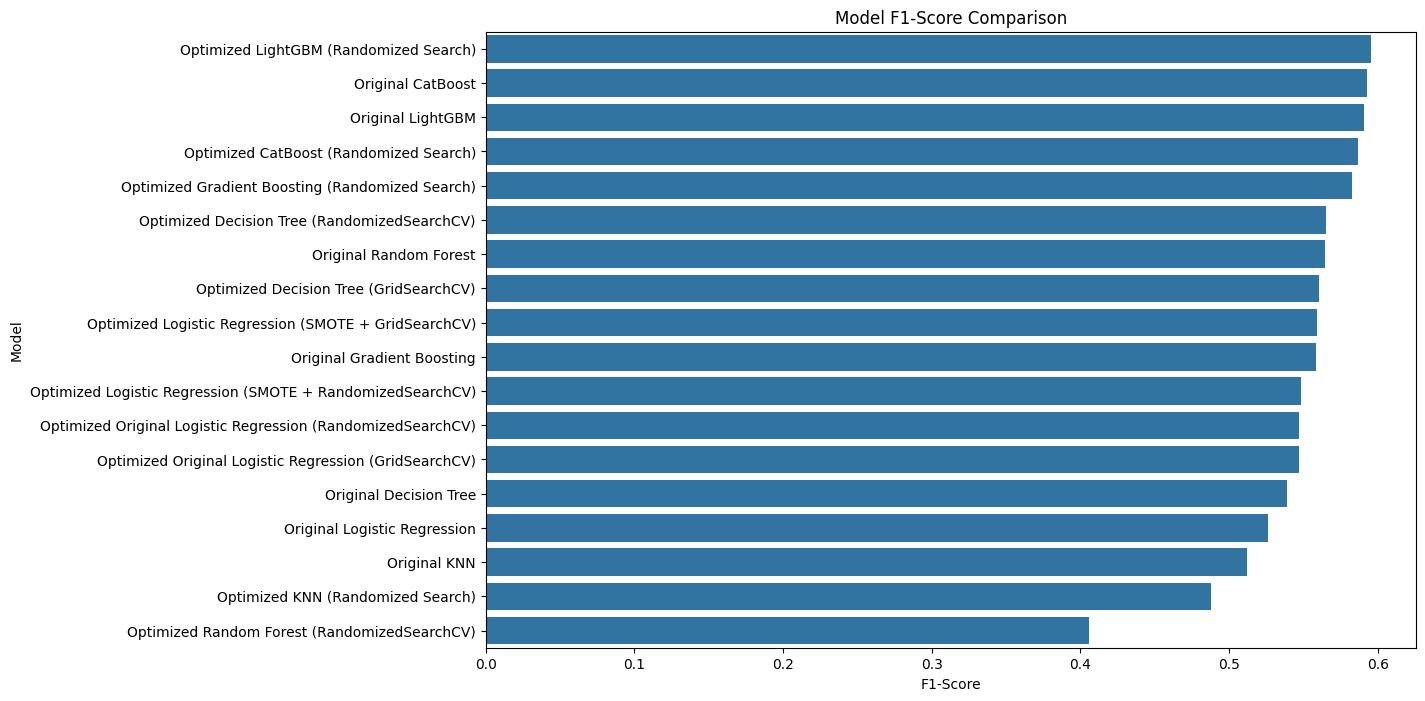

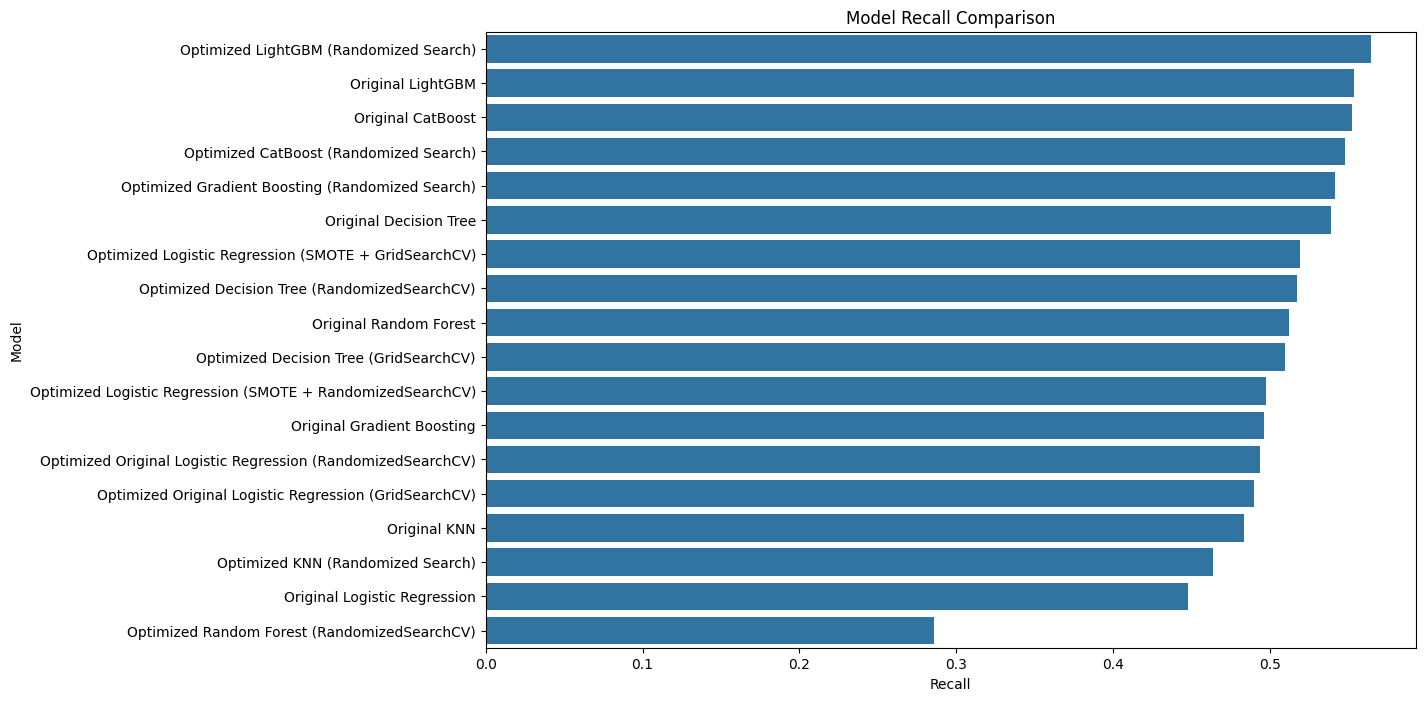

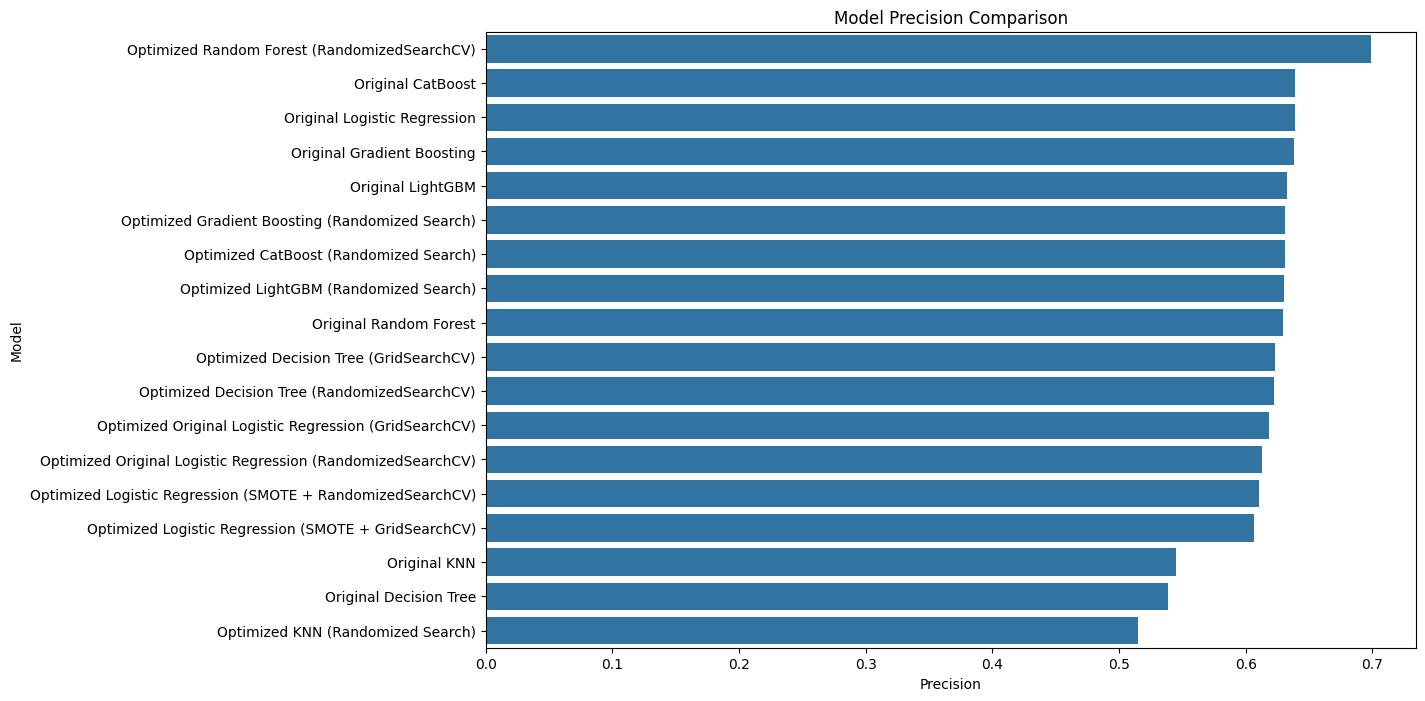

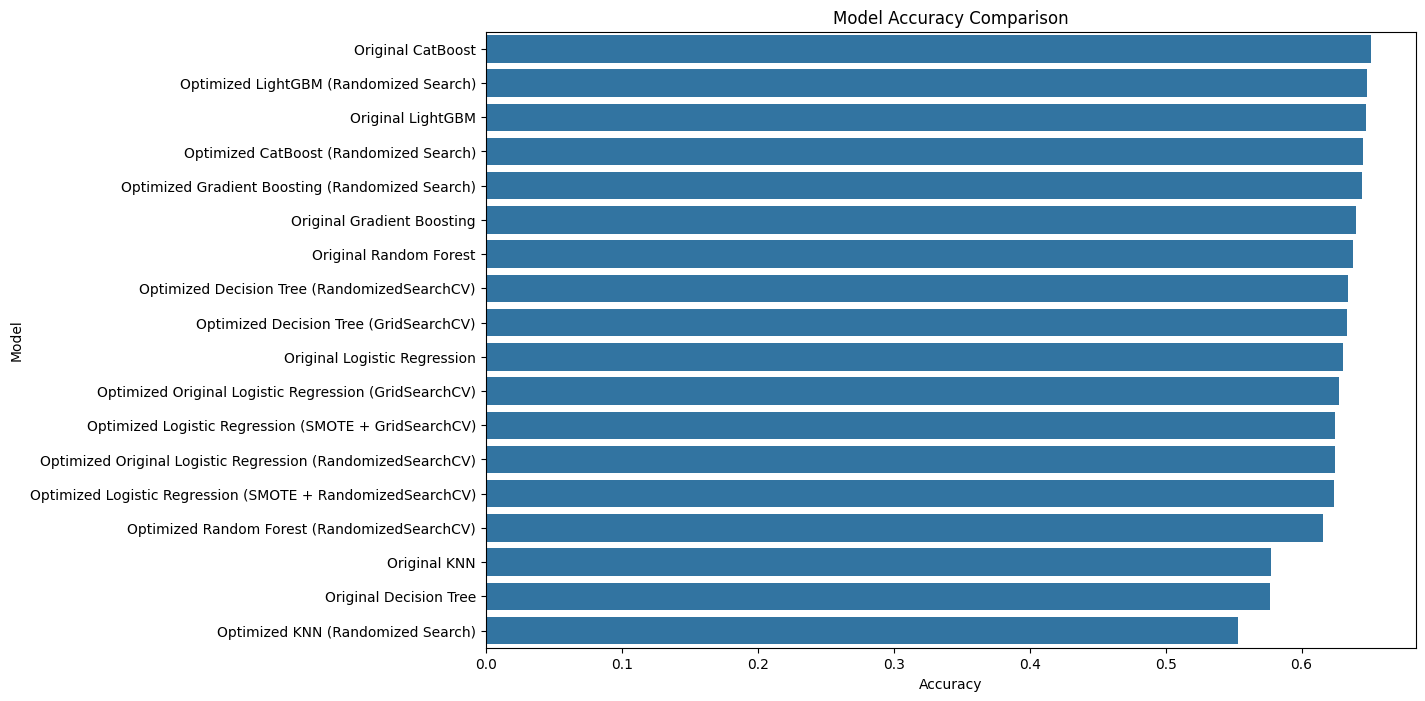

In [74]:
# Visualize the model performance
plt.figure(figsize=(12, 8))
sns.barplot(x='F1-Score', y='Model', data=df_performance.sort_values('F1-Score', ascending=False))
plt.title('Model F1-Score Comparison')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Recall', y='Model', data=df_performance.sort_values('Recall', ascending=False))
plt.title('Model Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Precision', y='Model', data=df_performance.sort_values('Precision', ascending=False))
plt.title('Model Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=df_performance.sort_values('Accuracy', ascending=False))
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# Feature Importance Analysis

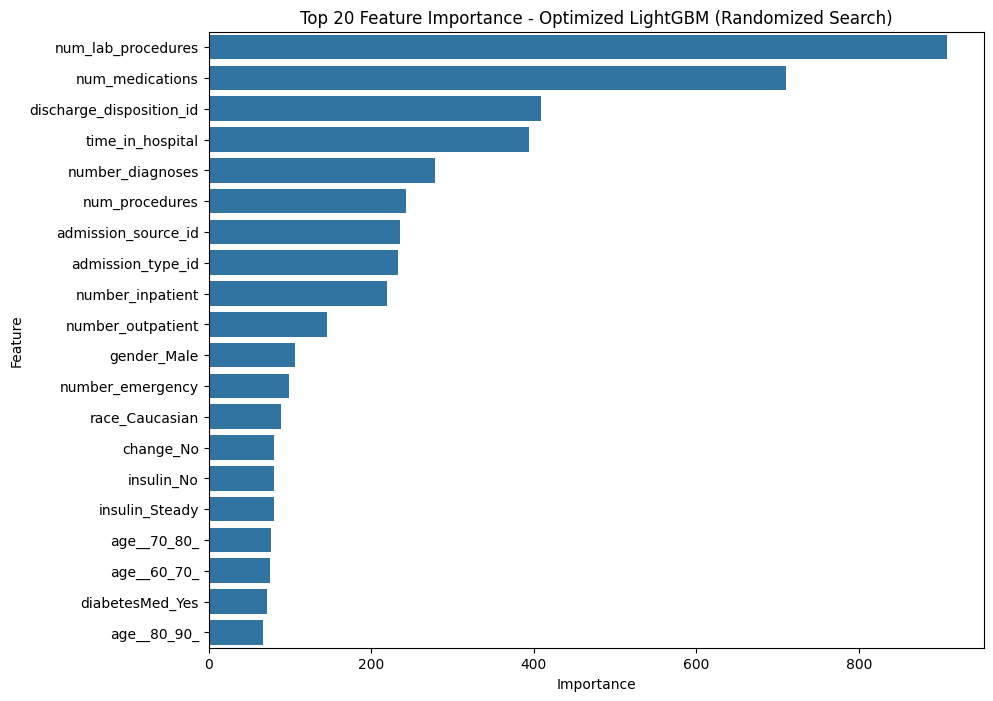

In [76]:
# Feature Importance for Optimized LightGBM (Randomized Search)
import matplotlib.pyplot as plt

# Ensure column names are clean for LightGBM
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]

feature_importance_lgb = optimized_lgb_model_rs.feature_importances_
features_lgb = X_train.columns
importance_df_lgb = pd.DataFrame({'Feature': features_lgb, 'Importance': feature_importance_lgb})
importance_df_lgb = importance_df_lgb.sort_values(by='Importance', ascending=False).head(20) # Display top 20

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_lgb)
plt.title('Top 20 Feature Importance - Optimized LightGBM (Randomized Search)')
plt.show()

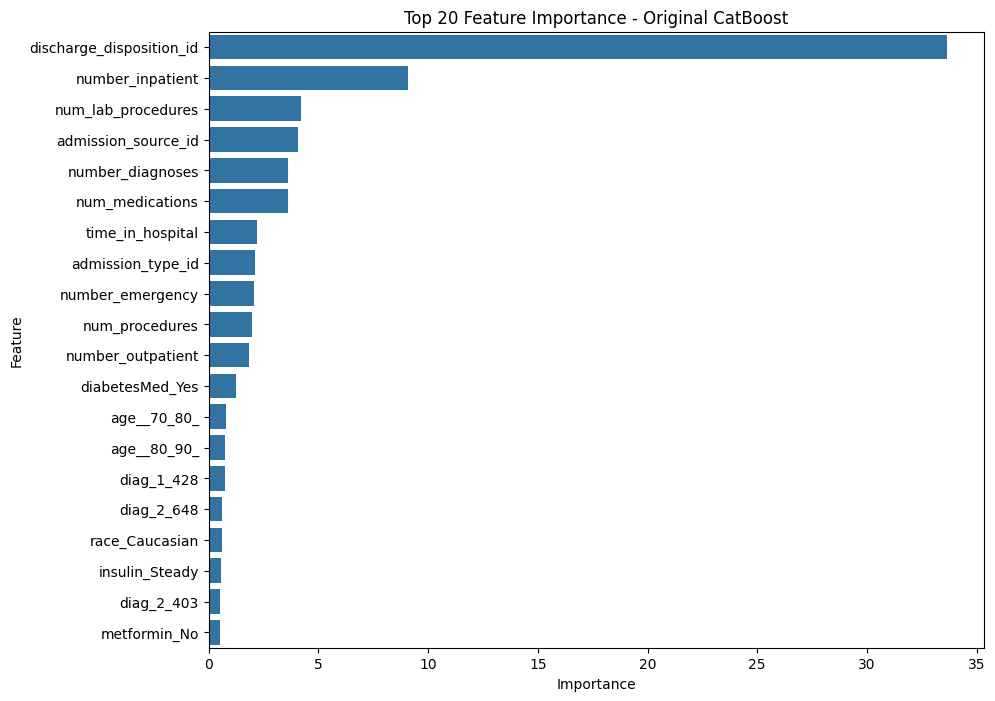

In [77]:
# Feature Importance for Original CatBoost
feature_importance_catboost = catboost_model.get_feature_importance()
features_catboost = X_train.columns # Assuming X_train columns are the same as used for CatBoost
importance_df_catboost = pd.DataFrame({'Feature': features_catboost, 'Importance': feature_importance_catboost})
importance_df_catboost = importance_df_catboost.sort_values(by='Importance', ascending=False).head(20) # Display top 20

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_catboost)
plt.title('Top 20 Feature Importance - Original CatBoost')
plt.show()

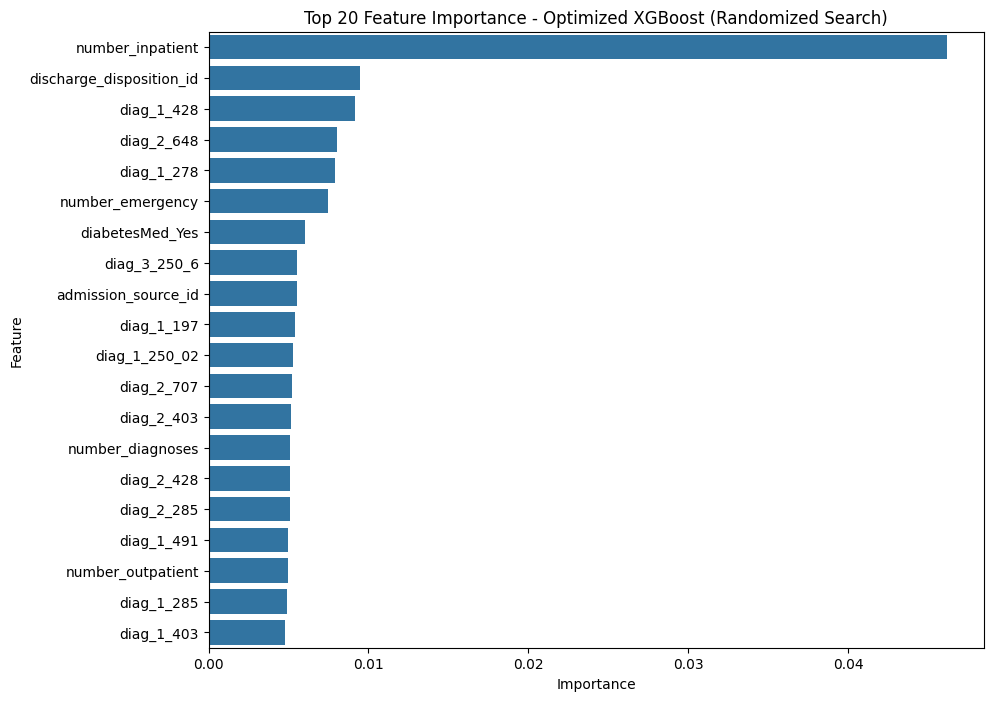

In [78]:
# Feature Importance for Optimized XGBoost (Randomized Search)
# Ensure column names are clean for XGBoost
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]

feature_importance_xgb = optimized_xgb_model_rs.feature_importances_
features_xgb = X_train.columns
importance_df_xgb = pd.DataFrame({'Feature': features_xgb, 'Importance': feature_importance_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False).head(20) # Display top 20

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb)
plt.title('Top 20 Feature Importance - Optimized XGBoost (Randomized Search)')
plt.show()

## Detailed Feature Analysis

Top 5 Features from LightGBM: ['num_lab_procedures', 'num_medications', 'discharge_disposition_id', 'time_in_hospital', 'number_diagnoses']


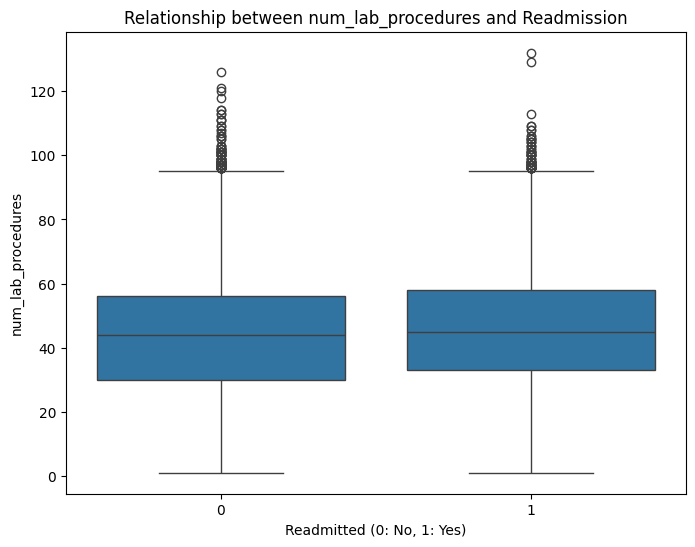

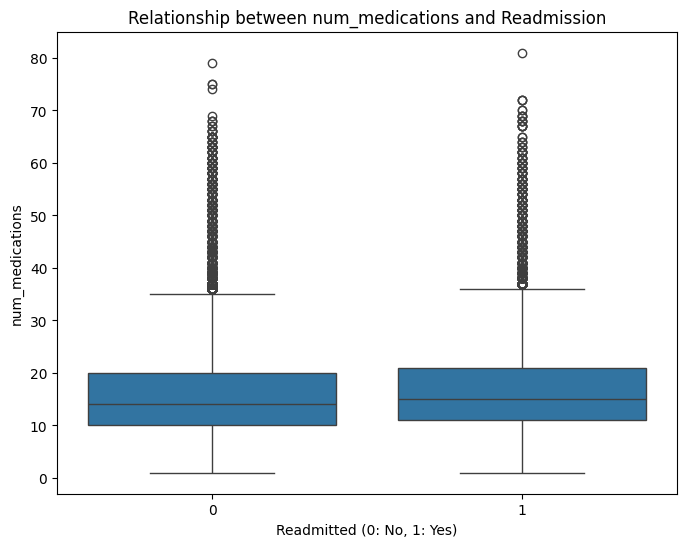

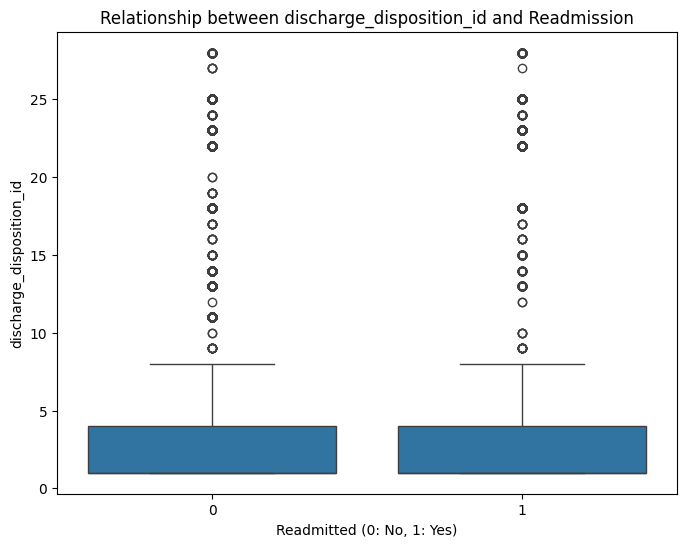

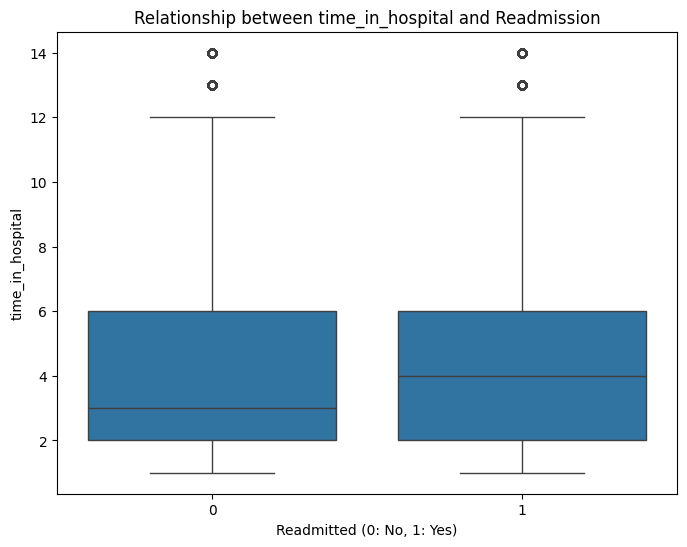

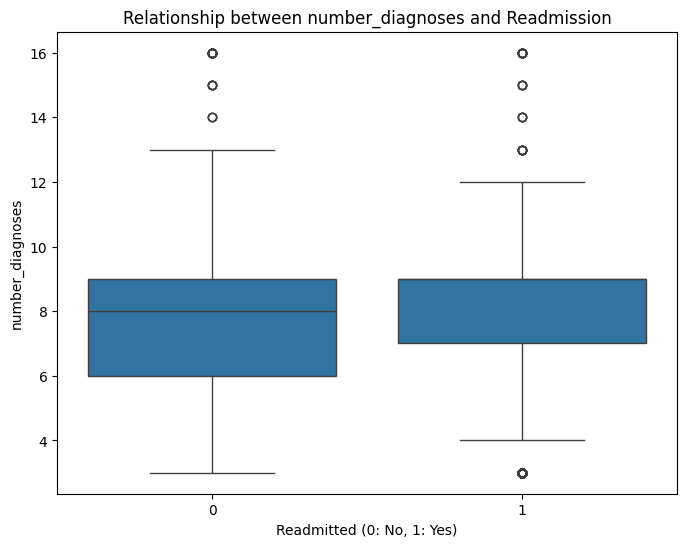

In [79]:
# Get the top 5 features from the LightGBM feature importance
top_5_features_lgb = importance_df_lgb['Feature'].head(5).tolist()
print("Top 5 Features from LightGBM:", top_5_features_lgb)

# Analyze the relationship between the top features and the target variable
for feature in top_5_features_lgb:
    # Check the data type of the feature in the original dataframe (before one-hot encoding)
    # We need to handle potential issues with feature names after one-hot encoding and scaling
    # Let's try to find the original column name or infer the type
    original_col_name = None
    for col in df.columns:
        if feature.startswith(col):
            original_col_name = col
            break

    if original_col_name and pd.api.types.is_numeric_dtype(df[original_col_name]):
        # If the original column is numeric, use a box plot or histogram
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df['readmited_binary'], y=df[original_col_name])
        plt.title(f'Relationship between {original_col_name} and Readmission')
        plt.xlabel('Readmitted (0: No, 1: Yes)')
        plt.ylabel(original_col_name)
        plt.show()
    elif original_col_name and pd.api.types.is_object_dtype(df[original_col_name]):
         # If the original column is categorical, use a count plot
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[original_col_name], hue=df['readmited_binary'])
        plt.title(f'Readmission Count by {original_col_name}')
        plt.xlabel(original_col_name)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Readmitted', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()
    else:
        # For one-hot encoded features, we can look at the distribution
        plt.figure(figsize=(8, 6))
        sns.countplot(x=df_encoded[feature], hue=df_encoded['readmited_binary'])
        plt.title(f'Readmission Count by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Readmitted', labels=['No', 'Yes'])
        plt.show()

# Model Interpretation using SHAP

In [80]:
!pip install shap

In [81]:
import shap

# Ensure column names are clean for SHAP
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]


# Create a SHAP explainer object using the best LightGBM model
explainer = shap.TreeExplainer(optimized_lgb_model_rs)

# Calculate SHAP values for a subset of the test data (e.g., the first 100 instances)
# Calculating SHAP values for the entire test set might be computationally intensive
shap_values = explainer.shap_values(X_test[:100])

# Visualize the SHAP values for a single instance (e.g., the first instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

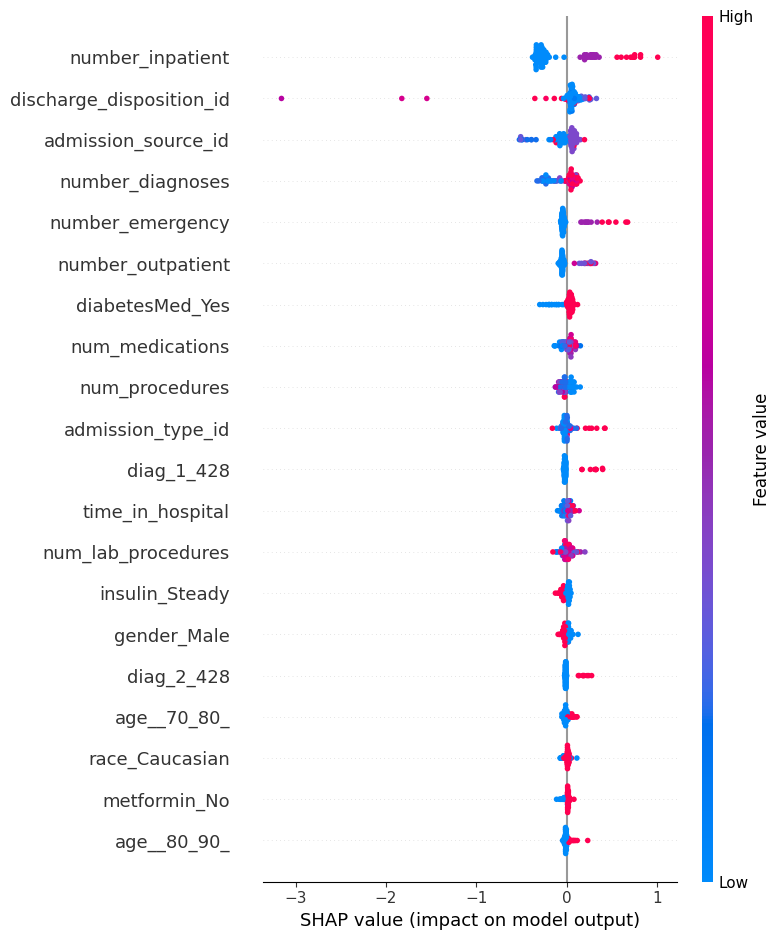

In [82]:
# Visualize the SHAP values for multiple instances (summary plot)
shap.initjs()
shap.summary_plot(shap_values, X_test[:100])

# Error Analysis

In [83]:
# Get the predictions for the Optimized LightGBM model
y_pred_optimized_lgb_rs = optimized_lgb_model_rs.predict(X_test)

# Identify false positives (predicted as 1, but actual is 0)
false_positives_indices = X_test.index[(y_pred_optimized_lgb_rs == 1) & (y_test == 0)]
false_positives = df.loc[false_positives_indices]

print("Examples of False Positives (Predicted Readmitted, Actual Not Readmitted):")
display(false_positives.head())

# Identify false negatives (predicted as 0, but actual is 1)
false_negatives_indices = X_test.index[(y_pred_optimized_lgb_rs == 0) & (y_test == 1)]
false_negatives = df.loc[false_negatives_indices]

print("\nExamples of False Negatives (Predicted Not Readmitted, Actual Readmitted):")
display(false_negatives.head())

Examples of False Positives (Predicted Readmitted, Actual Not Readmitted):


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmited_binary
44944,Caucasian,Female,[80-90),1,3,7,4,36,0,18,...,No,No,No,No,No,No,No,No,No,0
64953,Caucasian,Female,[80-90),2,22,1,5,10,2,22,...,No,No,No,No,No,No,No,Ch,Yes,0
33241,AfricanAmerican,Male,[70-80),1,1,7,4,77,0,15,...,No,Steady,No,No,No,No,No,Ch,Yes,0
23313,AfricanAmerican,Female,[40-50),1,1,7,4,60,0,23,...,No,Steady,No,No,No,No,No,Ch,Yes,0
80079,Caucasian,Female,[80-90),2,3,7,10,54,1,25,...,No,Down,No,No,No,No,No,Ch,Yes,0



Examples of False Negatives (Predicted Not Readmitted, Actual Readmitted):


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmited_binary
6702,Caucasian,Male,[60-70),3,5,1,3,20,1,16,...,No,No,No,No,No,No,No,No,No,1
79844,Caucasian,Male,[40-50),2,1,7,1,42,6,12,...,No,No,No,No,No,No,No,No,No,1
82655,Caucasian,Female,[80-90),2,1,1,5,69,0,16,...,No,Steady,No,No,No,No,No,Ch,Yes,1
9278,Caucasian,Male,[80-90),1,1,7,4,46,0,6,...,No,No,No,No,No,No,No,No,Yes,1
19334,Caucasian,Female,[70-80),2,3,1,9,42,4,14,...,No,Steady,No,No,No,No,No,No,Yes,1
